<img src="https://www.gov.br/mcti/pt-br/composicao/rede-mcti/INPE.png/@@images/068a9374-c0e5-4199-a707-7db5789dba55.png" align="left" style="height: 95px" height="95"/>
<!-- https://www.gov.br/mcti/pt-br/composicao/rede-mcti/instituto-nacional-de-pesquisas-espaciais -->
<img src="https://raw.githubusercontent.com/Harmonize-Brazil/code-gallery/main/img/harmonize_logo_without_white_background.png" align="right" style="height: 90px" height="90"/>

<h1 style="color:#274ad4; text-align: center">Using sits to obtain NDVI/EVI mean for each municipality</h1>
<h3 style="color:#274ad4; text-align: center">For each datacube date and each municipality, obtain NDVI/EVI mean</h3>
<hr style="border:2px solid #274ad4;">
<br/>  
    
<div style="text-align: center;font-size: 90%;">
    Luana Becker da Luz<sup><a href="https://orcid.org/0000-0003-2535-7658\" target="_blank" rel="noopener noreferrer"><img src="https://orcid.filecamp.com/static/thumbs/folders/qLJ1tuei4m6ugC3g.png" width="16"alt="ORCID iD" style="vertical-align: text-bottom;"/></a></sup>
    Ana Paula Dal'Asta<sup><a href="https://orcid.org/0000-0002-1286-9067" target="_blank" rel="noopener noreferrer"><img src="https://orcid.filecamp.com/static/thumbs/folders/qLJ1tuei4m6ugC3g.png" width="16"alt="ORCID iD" style="vertical-align: text-bottom;"/></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:luana.luz@inpe.br">luana.luz@inpe.br;</a><a href="mailto:apdalasta@gmail.com">apdalasta@gmail.com;</a>
    <br/><br/>
    Last Update: June 9, 2025
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook contains an example of using sits package to access BDC datacubes, select NDVI/EVI bands and extract these bands mean value for each ROI municipality. In this example, we chose as ROI Cametá/PA municipality and its neighbors.
</div>
</div>

# Initial configuration

In [54]:
# install.packages("geobr")

library(geobr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(sf)
library(sits)
library(terra)
library(glue)

# Set multicores

In [4]:
MULTICORES <- 4L

# 1. Set ROI - Cametá and its neighbors
<hr style="border:1px solid #0077b9;">

## 1.1 Get Brasil municipalities (2022)

Using year/date 2022



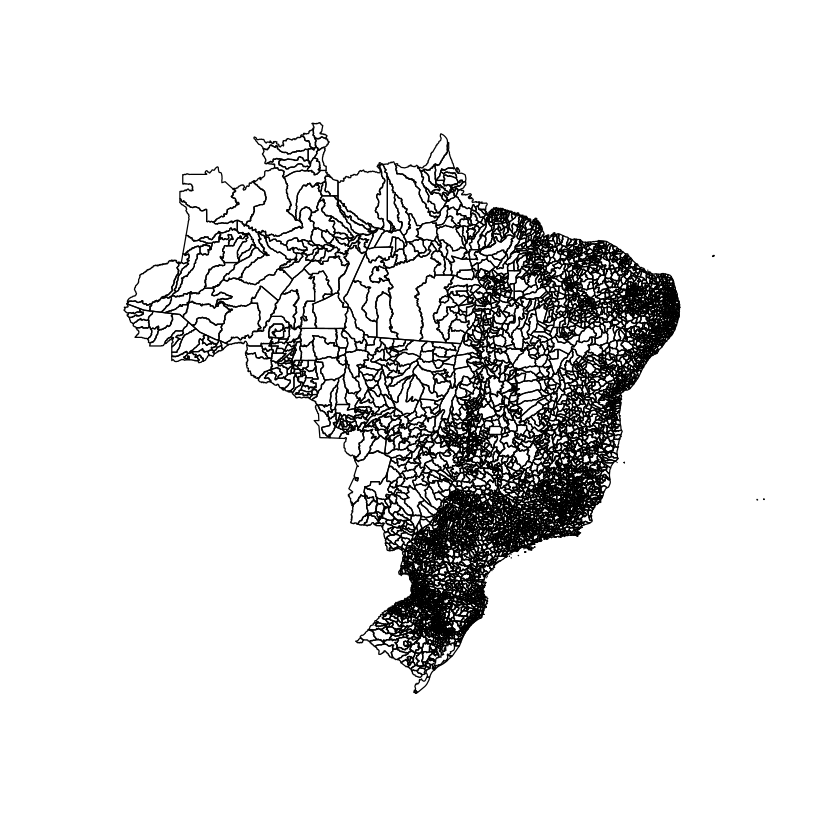

In [5]:
sf_munic <- geobr::read_municipality(year = 2022)
plot(st_geometry(sf_munic))

## 1.2 Filter municipalities only for Cametá and its neighbors

Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


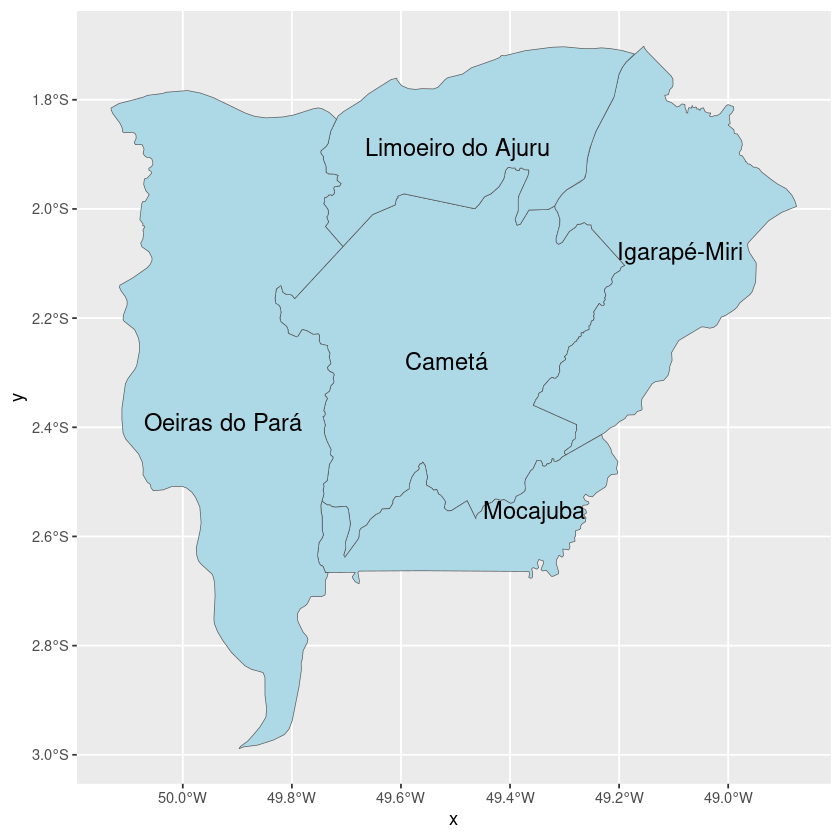

In [6]:
sf_cameta <- sf_munic %>% filter(name_muni == "Cametá")

neighbors_index <- st_intersects(sf_munic, sf_cameta, sparse = FALSE)[,1]
sf_roi <- sf_munic[neighbors_index, ]

ggplot(data = sf_roi) +
    geom_sf(fill = "lightblue") +
    geom_sf_text(aes(label = name_muni), size = 5, color = "black")

## 1.3 Obtain ROI bbox

In [61]:
bbox <- st_bbox(sf_roi)
bbox

      xmin       ymin       xmax       ymax 
-50.131496  -2.988819 -48.874601  -1.701760 

# 2. sits - Get data cube
<hr style="border:1px solid #0077b9;">

## 2.1 List all BDC collections

In [8]:
sits::sits_list_collections("BDC")

BDC:
- CBERS-WFI-16D (CBERS-4/WFI)
- grid system: BDC-Large V2
- period: 2016 to 2024
- bands: NDVI EVI B13 B14 B15 B16 CLOUD
- opendata collection (requires access token)

- CBERS-WFI-8D (CBERS-4-4A/WFI)
- grid system: BDC-Large V2
- period: 2020 to 2024
- bands: NDVI EVI B13 B14 B15 B16 CLOUD
- opendata collection (requires access token)

- CBERS-MUX-2M (CBERS-4/MUX)
- grid system: BDC-Medium V2
- period: 2016 to 2024
- bands: NDVI EVI B05 B06 B07 B08 CLOUD
- opendata collection (requires access token)

- LANDSAT-OLI-16D (LANDSAT/OLI)
- grid system: BDC-Medium V2
- period: 2010 to 2024
- bands: NDVI EVI COASTAL BLUE GREEN RED NIR08 SWIR16 SWIR22 CLOUD
- opendata collection (requires access token)

- MOD13Q1-6.1 (TERRA/MODIS)
- grid system: STG
- period: 2000 to 2024
- bands: NDVI EVI BLUE RED NIR MIR CLOUD
- opendata collection (requires access token)

- MYD13Q1-6.1 (AQUA/MODIS)
- grid system: STG
- period: 2002 to 2024
- bands: NDVI EVI BLUE RED NIR MIR CLOUD
- opendata collection (

## 2.2 Obtain cube based on collection, bbox, bands and dates

In [20]:
cube <- sits::sits_cube(
    source = "BDC",
    #collection = "SENTINEL-2-16D",
    collection = "MOD13Q1-6.1",
    bands = c("NDVI", "EVI"),
    roi = bbox,
    start_date = "2020-01-04",
    end_date = "2020-12-31",
    progress = TRUE
)

sits_timeline(cube)

Warning message:
“no CRS informed, assuming EPSG:4326”


  |======================================================================| 100%


[1] "2020-01-01" "2020-01-17" "2020-02-02" "2020-02-18" "2020-03-05"
 [6] "2020-03-21" "2020-04-06" "2020-04-22" "2020-05-08" "2020-05-24"
[11] "2020-06-09" "2020-06-25" "2020-07-11" "2020-07-27" "2020-08-12"
[16] "2020-08-28" "2020-09-13" "2020-09-29" "2020-10-15" "2020-10-31"
[21] "2020-11-16" "2020-12-02" "2020-12-18"

## 2.3 Print cube information

# A tibble: 46 × 14
   fid    date       band   xres  yres    xmin    ymin    xmax  ymax nrows ncols
   <chr>  <date>     <chr> <dbl> <dbl>   <dbl>   <dbl>   <dbl> <dbl> <dbl> <dbl>
 1 MOD13… 2020-01-01 EVI    232.  232. -6.67e6 -1.11e6 -5.56e6     0  4800  4800
 2 MOD13… 2020-01-01 NDVI   232.  232. -6.67e6 -1.11e6 -5.56e6     0  4800  4800
 3 MOD13… 2020-01-17 EVI    232.  232. -6.67e6 -1.11e6 -5.56e6     0  4800  4800
 4 MOD13… 2020-01-17 NDVI   232.  232. -6.67e6 -1.11e6 -5.56e6     0  4800  4800
 5 MOD13… 2020-02-02 EVI    232.  232. -6.67e6 -1.11e6 -5.56e6     0  4800  4800
 6 MOD13… 2020-02-02 NDVI   232.  232. -6.67e6 -1.11e6 -5.56e6     0  4800  4800
 7 MOD13… 2020-02-18 EVI    232.  232. -6.67e6 -1.11e6 -5.56e6     0  4800  4800
 8 MOD13… 2020-02-18 NDVI   232.  232. -6.67e6 -1.11e6 -5.56e6     0  4800  4800
 9 MOD13… 2020-03-05 EVI    232.  232. -6.67e6 -1.11e6 -5.56e6     0  4800  4800
10 MOD13… 2020-03-05 NDVI   232.  232. -6.67e6 -1.11e6 -5.56e6     0  4800  4800
# ℹ 36 m

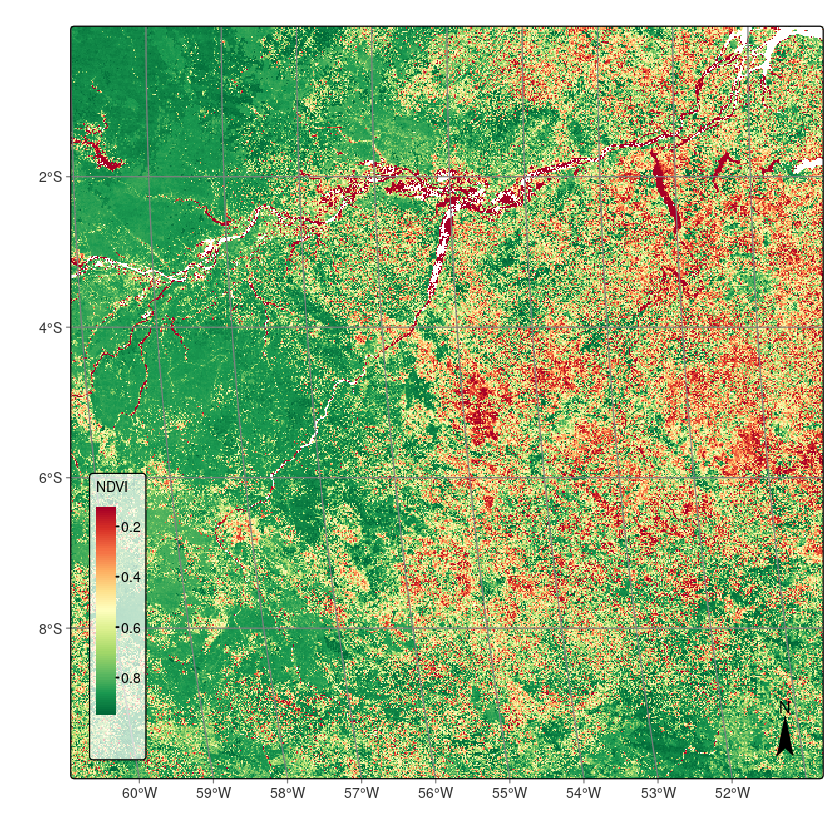

In [22]:
print(cube$file_info[[1]])
print(cube$tile)
plot(cube, band = "NDVI", time = 1)

## 2.4 For each datetime, mosaic all images

**Using 4 multicores and getting data only for 2020 (23 dates), this process takes around 1.5 minutes and store 3.5GB of data in tmp folder.**

### 2.4.1 Create a tmp folder where mosaics will be computed

In [23]:
TMP_RASTERS_FOLDER <- "tmp"

if (!file.exists(TMP_RASTERS_FOLDER)) {
    dir.create(TMP_RASTERS_FOLDER, recursive = TRUE)
    print(glue("Folder '{TMP_RASTERS_FOLDER}' was created!"))
} else{
    print(glue("Folder '{TMP_RASTERS_FOLDER}' already exists! Please, delete it using 'rm -rf' on terminal and recreate it using this cell."))
}

Folder 'tmp' was created!


### 2.4.2 Runs mosaic

Warning message:
“no CRS informed, assuming EPSG:4326”


  |======================================================================| 100%
  |======================================================================| 100%


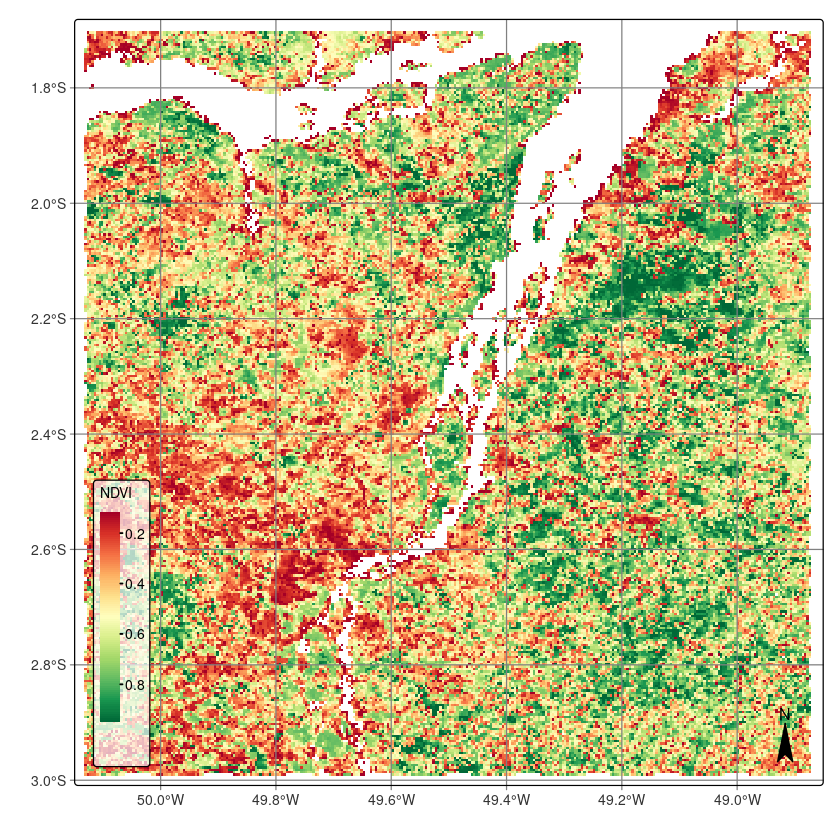

In [24]:
mosaic_cube <- sits_mosaic(
    cube = cube,
    roi = bbox,
    crs = "EPSG:4326",
    output_dir = TMP_RASTERS_FOLDER,
    multicores = MULTICORES,
    progress = TRUE
)

plot(mosaic_cube, band = "NDVI", time = 1)

### 2.4.3 List generated files

In [26]:
mosaic_filepaths <- list.files(TMP_RASTERS_FOLDER, full.names = TRUE, pattern = "*MOSAIC*")
print(length(mosaic_filepaths))
mosaic_filepaths

[1] 46


[1] "tmp/TERRA_MODIS_MOSAIC_2020-01-01_2020-01-01_EVI_v1.tif" 
 [2] "tmp/TERRA_MODIS_MOSAIC_2020-01-01_2020-01-01_NDVI_v1.tif"
 [3] "tmp/TERRA_MODIS_MOSAIC_2020-01-17_2020-01-17_EVI_v1.tif" 
 [4] "tmp/TERRA_MODIS_MOSAIC_2020-01-17_2020-01-17_NDVI_v1.tif"
 [5] "tmp/TERRA_MODIS_MOSAIC_2020-02-02_2020-02-02_EVI_v1.tif" 
 [6] "tmp/TERRA_MODIS_MOSAIC_2020-02-02_2020-02-02_NDVI_v1.tif"
 [7] "tmp/TERRA_MODIS_MOSAIC_2020-02-18_2020-02-18_EVI_v1.tif" 
 [8] "tmp/TERRA_MODIS_MOSAIC_2020-02-18_2020-02-18_NDVI_v1.tif"
 [9] "tmp/TERRA_MODIS_MOSAIC_2020-03-05_2020-03-05_EVI_v1.tif" 
[10] "tmp/TERRA_MODIS_MOSAIC_2020-03-05_2020-03-05_NDVI_v1.tif"
[11] "tmp/TERRA_MODIS_MOSAIC_2020-03-21_2020-03-21_EVI_v1.tif" 
[12] "tmp/TERRA_MODIS_MOSAIC_2020-03-21_2020-03-21_NDVI_v1.tif"
[13] "tmp/TERRA_MODIS_MOSAIC_2020-04-06_2020-04-06_EVI_v1.tif" 
[14] "tmp/TERRA_MODIS_MOSAIC_2020-04-06_2020-04-06_NDVI_v1.tif"
[15] "tmp/TERRA_MODIS_MOSAIC_2020-04-22_2020-04-22_EVI_v1.tif" 
[16] "tmp/TERRA_MODIS_MOSAIC_2020-04-22_2020-04-22_NDVI_v1.tif"
[17] "tmp/TERRA_MODIS_MOSAIC_2020-05-08_2020-05-08_EVI_v1.tif" 
[18] "tmp/TERRA_MODIS_MOSAIC_2020-05-08_2020-05-08_NDVI_v1.tif"
[19] "tmp/TERRA_MODIS_MOSAIC_2020-05-24_2020-05-24_EVI_v1.tif" 
[20] "tmp/TERRA_MODIS_MOSAIC_2020-05-24_2020-05-24_NDVI_v1.tif"
[21] "tmp/TERRA_MODIS_MOSAIC_2020-06-09_2020-06-09_EVI_v1.tif" 
[22] "tmp/TERRA_MODIS_MOSAIC_2020-06-09_2020-06-09_NDVI_v1.tif"
[23] "tmp/TERRA_MODIS_MOSAIC_2020-06-25_2020-06-25_EVI_v1.tif" 
[24] "tmp/TERRA_MODIS_MOSAIC_2020-06-25_2020-06-25_NDVI_v1.tif"
[25] "tmp/TERRA_MODIS_MOSAIC_2020-07-11_2020-07-11_EVI_v1.tif" 
[26] "tmp/TERRA_MODIS_MOSAIC_2020-07-11_2020-07-11_NDVI_v1.tif"
[27] "tmp/TERRA_MODIS_MOSAIC_2020-07-27_2020-07-27_EVI_v1.tif" 
[28] "tmp/TERRA_MODIS_MOSAIC_2020-07-27_2020-07-27_NDVI_v1.tif"
[29] "tmp/TERRA_MODIS_MOSAIC_2020-08-12_2020-08-12_EVI_v1.tif" 
[30] "tmp/TERRA_MODIS_MOSAIC_2020-08-12_2020-08-12_NDVI_v1.tif"
[31] "tmp/TERRA_MODIS_MOSAIC_2020-08-28_2020-08-28_EVI_v1.tif" 
[32] "tmp/TERRA_MODIS_MOSAIC_2020-08-28_2020-08-28_NDVI_v1.tif"
[33] "tmp/TERRA_MODIS_MOSAIC_2020-09-13_2020-09-13_EVI_v1.tif" 
[34] "tmp/TERRA_MODIS_MOSAIC_2020-09-13_2020-09-13_NDVI_v1.tif"
[35] "tmp/TERRA_MODIS_MOSAIC_2020-09-29_2020-09-29_EVI_v1.tif" 
[36] "tmp/TERRA_MODIS_MOSAIC_2020-09-29_2020-09-29_NDVI_v1.tif"
[37] "tmp/TERRA_MODIS_MOSAIC_2020-10-15_2020-10-15_EVI_v1.tif" 
[38] "tmp/TERRA_MODIS_MOSAIC_2020-10-15_2020-10-15_NDVI_v1.tif"
[39] "tmp/TERRA_MODIS_MOSAIC_2020-10-31_2020-10-31_EVI_v1.tif" 
[40] "tmp/TERRA_MODIS_MOSAIC_2020-10-31_2020-10-31_NDVI_v1.tif"
[41] "tmp/TERRA_MODIS_MOSAIC_2020-11-16_2020-11-16_EVI_v1.tif" 
[42] "tmp/TERRA_MODIS_MOSAIC_2020-11-16_2020-11-16_NDVI_v1.tif"
[43] "tmp/TERRA_MODIS_MOSAIC_2020-12-02_2020-12-02_EVI_v1.tif" 
[44] "tmp/TERRA_MODIS_MOSAIC_2020-12-02_2020-12-02_NDVI_v1.tif"
[45] "tmp/TERRA_MODIS_MOSAIC_2020-12-18_2020-12-18_EVI_v1.tif" 
[46] "tmp/TERRA_MODIS_MOSAIC_2020-12-18_2020-12-18_NDVI_v1.tif"

# 3. Extract NDVI/EVI mean for each municipality

## 3.1 Test - Extraction for only one datetime

In [60]:
# Create raster
r <- terra::rast(
    c(file.path(TMP_RASTERS_FOLDER, "TERRA_MODIS_MOSAIC_2020-01-01_2020-01-01_EVI_v1.tif"),
      file.path(TMP_RASTERS_FOLDER, "TERRA_MODIS_MOSAIC_2020-01-01_2020-01-01_NDVI_v1.tif"))
)
# Set raster band names. Otherwise, it will set file name
names(r) <- c("EVI", "NDVI")

# Extract mean for each feature in sf_roi
df_extracted <- terra::extract(
    r,
    terra::vect(sf_roi),
    fun = mean,
    na.rm = TRUE
)
df_extracted

# Print sf_roi
head(as.data.frame(sf_roi), 10)

# Merge bands mean with ROI
sf_binded <- dplyr::bind_cols(sf_roi, df_extracted)
head(as.data.frame(sf_binded), 10)

Warning message:
“[extract] transforming vector data to the CRS of the raster”


ID,EVI,NDVI
<int>,<dbl>,<dbl>
1,3355.913,5120.342
2,3615.463,5871.210
3,3738.621,5668.621
4,3192.804,4900.624
5,3183.893,4561.170


,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geom
,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<MULTIPOLYGON [°]>
183,1502103,Cametá,15,PA,Pará,1,Norte,MULTIPOLYGON (((-49.26383 -...
205,1503309,Igarapé-Miri,15,PA,Pará,1,Norte,MULTIPOLYGON (((-48.93877 -...
214,1504000,Limoeiro do Ajuru,15,PA,Pará,1,Norte,MULTIPOLYGON (((-49.24271 -...
223,1504604,Mocajuba,15,PA,Pará,1,Norte,MULTIPOLYGON (((-49.3886 -2...
234,1505205,Oeiras do Pará,15,PA,Pará,1,Norte,MULTIPOLYGON (((-49.78977 -...


,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,ID,EVI,NDVI,geom
,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,1502103,Cametá,15,PA,Pará,1,Norte,1,3355.913,5120.342,MULTIPOLYGON (((-49.26383 -...
2,1503309,Igarapé-Miri,15,PA,Pará,1,Norte,2,3615.463,5871.210,MULTIPOLYGON (((-48.93877 -...
3,1504000,Limoeiro do Ajuru,15,PA,Pará,1,Norte,3,3738.621,5668.621,MULTIPOLYGON (((-49.24271 -...
4,1504604,Mocajuba,15,PA,Pará,1,Norte,4,3192.804,4900.624,MULTIPOLYGON (((-49.3886 -2...
5,1505205,Oeiras do Pará,15,PA,Pará,1,Norte,5,3183.893,4561.170,MULTIPOLYGON (((-49.78977 -...


## 3.2 Extraction for all dates and bands

### 3.2.1 Get cube files_info

In [43]:
# Get cube file_info
file_info <- mosaic_cube["file_info"][[1]][[1]]
head(file_info)
names(file_info)

fid,band,date,ncols,nrows,xres,yres,xmin,xmax,ymin,ymax,crs,path
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
MOD13Q1.A2020001.h12v09.061.2020326032148,EVI,2020-01-01,623,637,0.002084197,0.002084197,-50.14918,-48.85073,-3.00903,-1.681396,EPSG:4326,tmp/TERRA_MODIS_MOSAIC_2020-01-01_2020-01-01_EVI_v1.tif
MOD13Q1.A2020001.h12v09.061.2020326032148,NDVI,2020-01-01,623,637,0.002084197,0.002084197,-50.14918,-48.85073,-3.00903,-1.681396,EPSG:4326,tmp/TERRA_MODIS_MOSAIC_2020-01-01_2020-01-01_NDVI_v1.tif
MOD13Q1.A2020017.h12v09.061.2020328132348,EVI,2020-01-17,623,637,0.002084197,0.002084197,-50.14918,-48.85073,-3.00903,-1.681396,EPSG:4326,tmp/TERRA_MODIS_MOSAIC_2020-01-17_2020-01-17_EVI_v1.tif
MOD13Q1.A2020017.h12v09.061.2020328132348,NDVI,2020-01-17,623,637,0.002084197,0.002084197,-50.14918,-48.85073,-3.00903,-1.681396,EPSG:4326,tmp/TERRA_MODIS_MOSAIC_2020-01-17_2020-01-17_NDVI_v1.tif
MOD13Q1.A2020033.h12v09.061.2020329055512,EVI,2020-02-02,623,637,0.002084197,0.002084197,-50.14918,-48.85073,-3.00903,-1.681396,EPSG:4326,tmp/TERRA_MODIS_MOSAIC_2020-02-02_2020-02-02_EVI_v1.tif
MOD13Q1.A2020033.h12v09.061.2020329055512,NDVI,2020-02-02,623,637,0.002084197,0.002084197,-50.14918,-48.85073,-3.00903,-1.681396,EPSG:4326,tmp/TERRA_MODIS_MOSAIC_2020-02-02_2020-02-02_NDVI_v1.tif


[1] "fid"   "band"  "date"  "ncols" "nrows" "xres"  "yres"  "xmin"  "xmax" 
[10] "ymin"  "ymax"  "crs"   "path"

### 3.2.2 From file_info, select dates, bands and paths

In [44]:
file_info <- file_info %>% select(c("band", "date", "path")) %>% mutate(date = as.character(date))
head(file_info)

band,date,path
<chr>,<chr>,<chr>
EVI,2020-01-01,tmp/TERRA_MODIS_MOSAIC_2020-01-01_2020-01-01_EVI_v1.tif
NDVI,2020-01-01,tmp/TERRA_MODIS_MOSAIC_2020-01-01_2020-01-01_NDVI_v1.tif
EVI,2020-01-17,tmp/TERRA_MODIS_MOSAIC_2020-01-17_2020-01-17_EVI_v1.tif
NDVI,2020-01-17,tmp/TERRA_MODIS_MOSAIC_2020-01-17_2020-01-17_NDVI_v1.tif
EVI,2020-02-02,tmp/TERRA_MODIS_MOSAIC_2020-02-02_2020-02-02_EVI_v1.tif
NDVI,2020-02-02,tmp/TERRA_MODIS_MOSAIC_2020-02-02_2020-02-02_NDVI_v1.tif


### 3.2.3 Obtain unique dates

In [45]:
unique_dates <- unique(file_info$date)
unique_dates

[1] "2020-01-01" "2020-01-17" "2020-02-02" "2020-02-18" "2020-03-05"
 [6] "2020-03-21" "2020-04-06" "2020-04-22" "2020-05-08" "2020-05-24"
[11] "2020-06-09" "2020-06-25" "2020-07-11" "2020-07-27" "2020-08-12"
[16] "2020-08-28" "2020-09-13" "2020-09-29" "2020-10-15" "2020-10-31"
[21] "2020-11-16" "2020-12-02" "2020-12-18"

### 3.2.4 For each date, load all bands as one raster and extract mean

In [51]:
list_sf_mean_extracted <- lapply(
    X = unique_dates,
    FUN = function(current_date) {
        # Filter cube_info to get all images from current date
        filtered <- file_info %>% filter(date == current_date)
        
        # Open all different bands files in one raster
        rasters <- terra::rast(filtered$path)
        # Rename raster names (e.g. NDVI, EVI)
        names(rasters) <- filtered$band
        
        # Extract mean in all raster bands for each ROI feature
        df_extracted <- terra::extract(
            rasters,
            terra::vect(sf_roi),
            fun = mean,
            na.rm = TRUE
        )
        
        # Bind computed df with sf_roi, remove ID column and add date column
        sf_computed <- dplyr::bind_cols(sf_roi, df_extracted) %>%
            select(-ID) %>%
            mutate(date = current_date)
        
        return (sf_computed)
    }
)
list_sf_mean_extracted[1:3]

Warning message:
“[extract] transforming vector data to the CRS of the raster”
Warning message:
“[extract] transforming vector data to the CRS of the raster”
Warning message:
“[extract] transforming vector data to the CRS of the raster”
Warning message:
“[extract] transforming vector data to the CRS of the raster”
Warning message:
“[extract] transforming vector data to the CRS of the raster”
Warning message:
“[extract] transforming vector data to the CRS of the raster”
Warning message:
“[extract] transforming vector data to the CRS of the raster”
Warning message:
“[extract] transforming vector data to the CRS of the raster”
Warning message:
“[extract] transforming vector data to the CRS of the raster”
Warning message:
“[extract] transforming vector data to the CRS of the raster”
Warning message:
“[extract] transforming vector data to the CRS of the raster”
Warning message:
“[extract] transforming vector data to the CRS of the raster”
Warning message:
“[extract] transforming vector data

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,EVI,NDVI,geom,date
,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [°]>,<chr>
1,1502103,Cametá,15,PA,Pará,1,Norte,3355.913,5120.342,MULTIPOLYGON (((-49.26383 -...,2020-01-01
2,1503309,Igarapé-Miri,15,PA,Pará,1,Norte,3615.463,5871.210,MULTIPOLYGON (((-48.93877 -...,2020-01-01
3,1504000,Limoeiro do Ajuru,15,PA,Pará,1,Norte,3738.621,5668.621,MULTIPOLYGON (((-49.24271 -...,2020-01-01
4,1504604,Mocajuba,15,PA,Pará,1,Norte,3192.804,4900.624,MULTIPOLYGON (((-49.3886 -2...,2020-01-01
5,1505205,Oeiras do Pará,15,PA,Pará,1,Norte,3183.893,4561.170,MULTIPOLYGON (((-49.78977 -...,2020-01-01
,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,EVI,NDVI,geom,date
,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [°]>,<chr>
1,1502103,Cametá,15,PA,Pará,1,Norte,4248.324,5751.826,MULTIPOLYGON (((-49.26383 -...,2020-01-17
2,1503309,Igarapé-Miri,15,PA,Pará,1,Norte,4667.882,6147.477,MULTIPOLYGON (((-48.93877 -...,2020-01-17


### 3.2.5 Bind all sf dataframes into one

In [66]:
df_municipalities_mean <- bind_rows(list_sf_mean_extracted) %>%
    as.data.frame() %>%
    pivot_longer(cols = c("NDVI", "EVI"), names_to = "band", values_to = "value") %>%
    select("code_muni", "name_muni", "date", "band", "value")
    
dim(df_municipalities_mean)
head(df_municipalities_mean, 15)

[1] 230   5

code_muni,name_muni,date,band,value
<dbl>,<chr>,<chr>,<chr>,<dbl>
1502103,Cametá,2020-01-01,NDVI,5120.342
1502103,Cametá,2020-01-01,EVI,3355.913
1503309,Igarapé-Miri,2020-01-01,NDVI,5871.210
1503309,Igarapé-Miri,2020-01-01,EVI,3615.463
1504000,Limoeiro do Ajuru,2020-01-01,NDVI,5668.621
1504000,Limoeiro do Ajuru,2020-01-01,EVI,3738.621
1504604,Mocajuba,2020-01-01,NDVI,4900.624
1504604,Mocajuba,2020-01-01,EVI,3192.804
1505205,Oeiras do Pará,2020-01-01,NDVI,4561.170


### 3.2.6 Plot 1

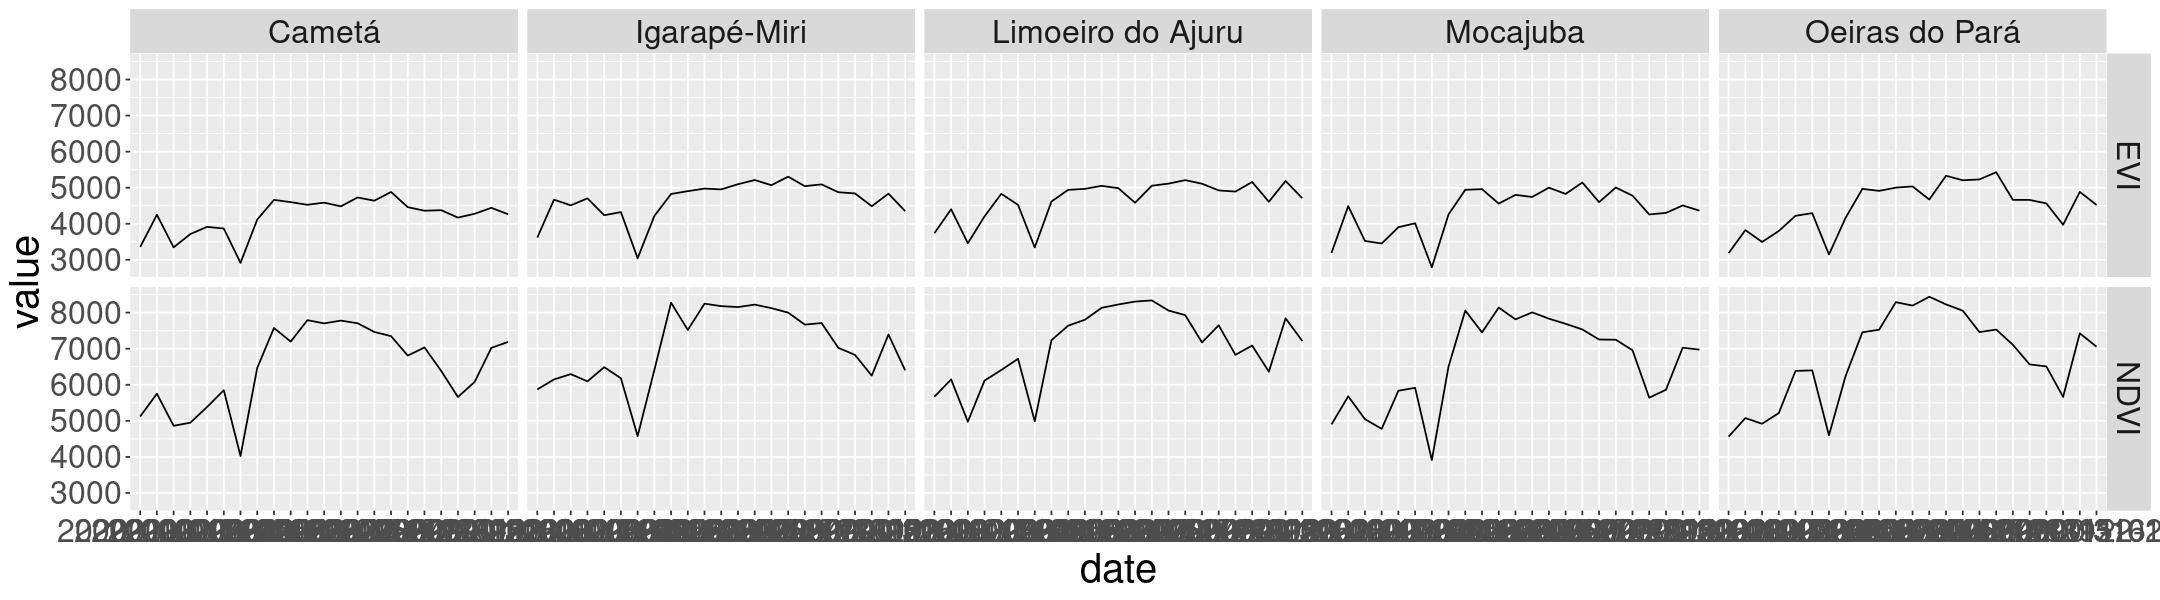

In [93]:
options(repr.plot.height=5, repr.plot.width=18)

df_municipalities_mean %>%
    ggplot(aes(x=date, y=value, group=band)) +
        facet_grid(band ~ name_muni) +
        geom_line() +
        theme(text = element_text(size = 24))
        

### 3.2.7 Plot 2

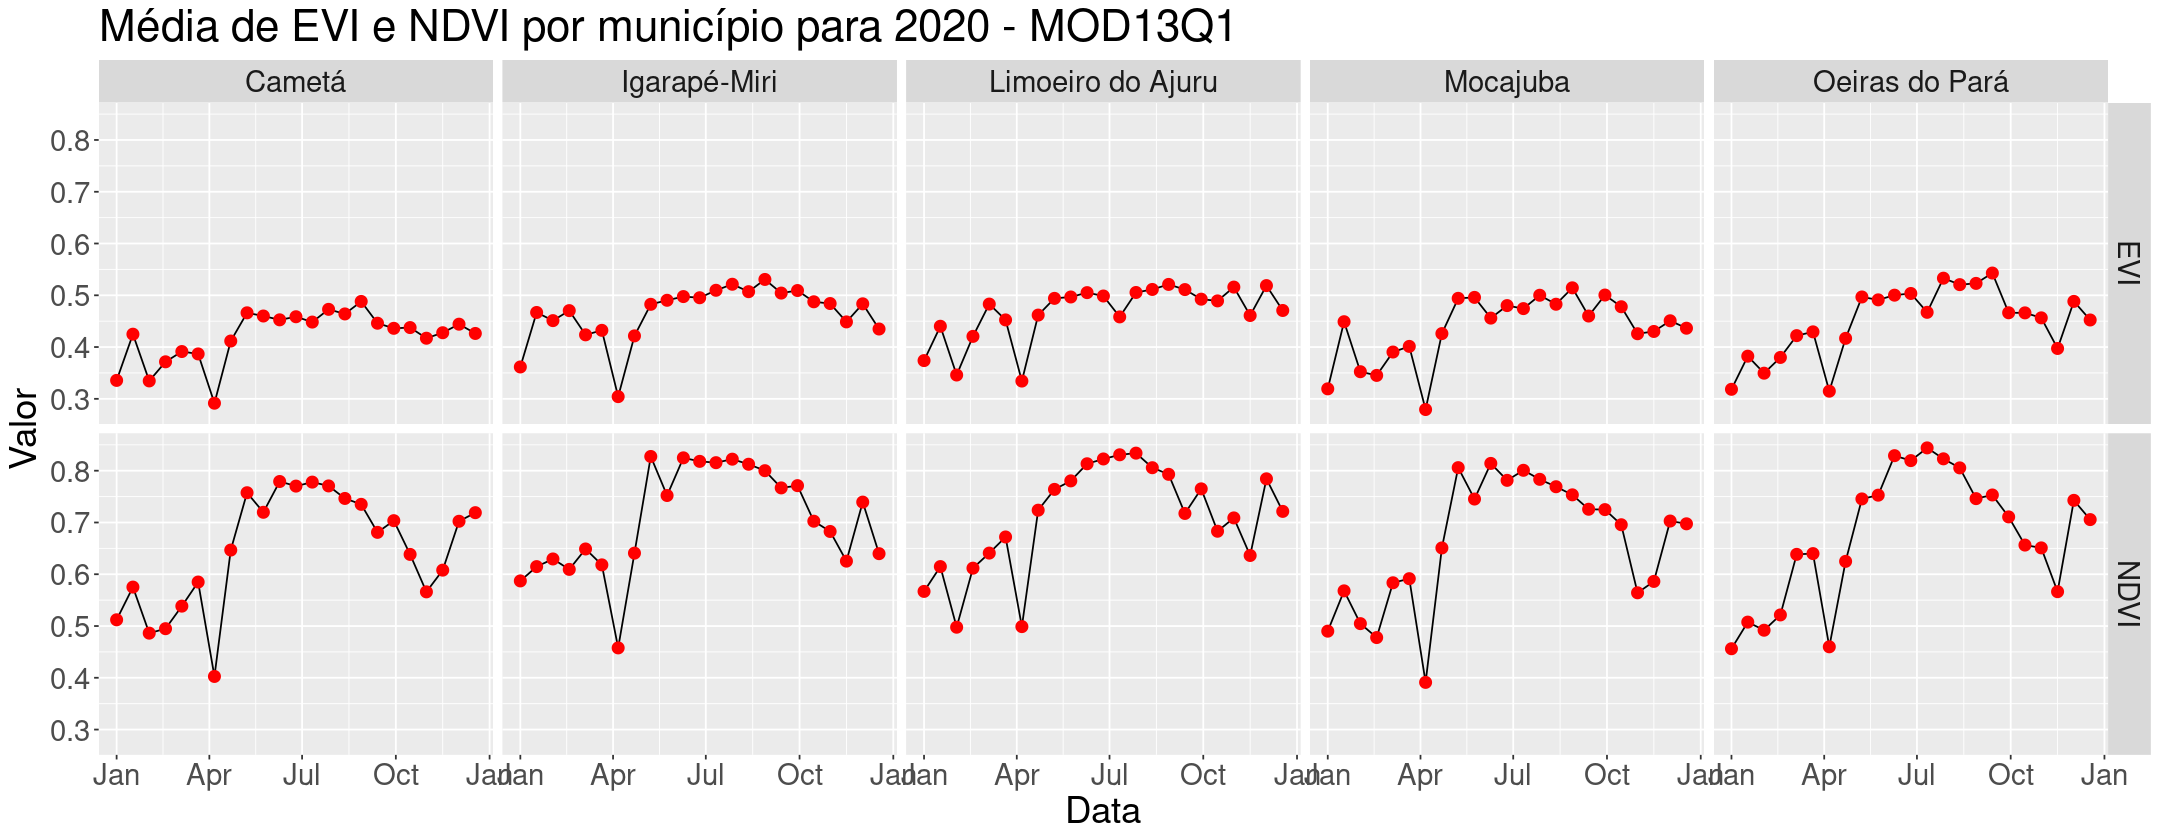

In [94]:
options(repr.plot.height=7, repr.plot.width=18)

df_municipalities_mean %>%
    mutate(value = value / 10000) %>%
    mutate(date = as.Date(date, format = "%Y-%m-%d")) %>%
    ggplot(aes(x=date, y=value, group=band)) +
        facet_grid(band ~ name_muni) +
        geom_line() +
        labs(title = "Média de EVI e NDVI por município para 2020 - MOD13Q1", x = "Data", y = "Valor") + 
        geom_point(color = "red", size = 3) + 
        scale_x_date(date_labels = "%b") + 
        theme(
            text = element_text(size = 22)
            # axis.text.x = element_text(angle = 45, hjust = 1)
        )

### 3.2.8 Plot 3

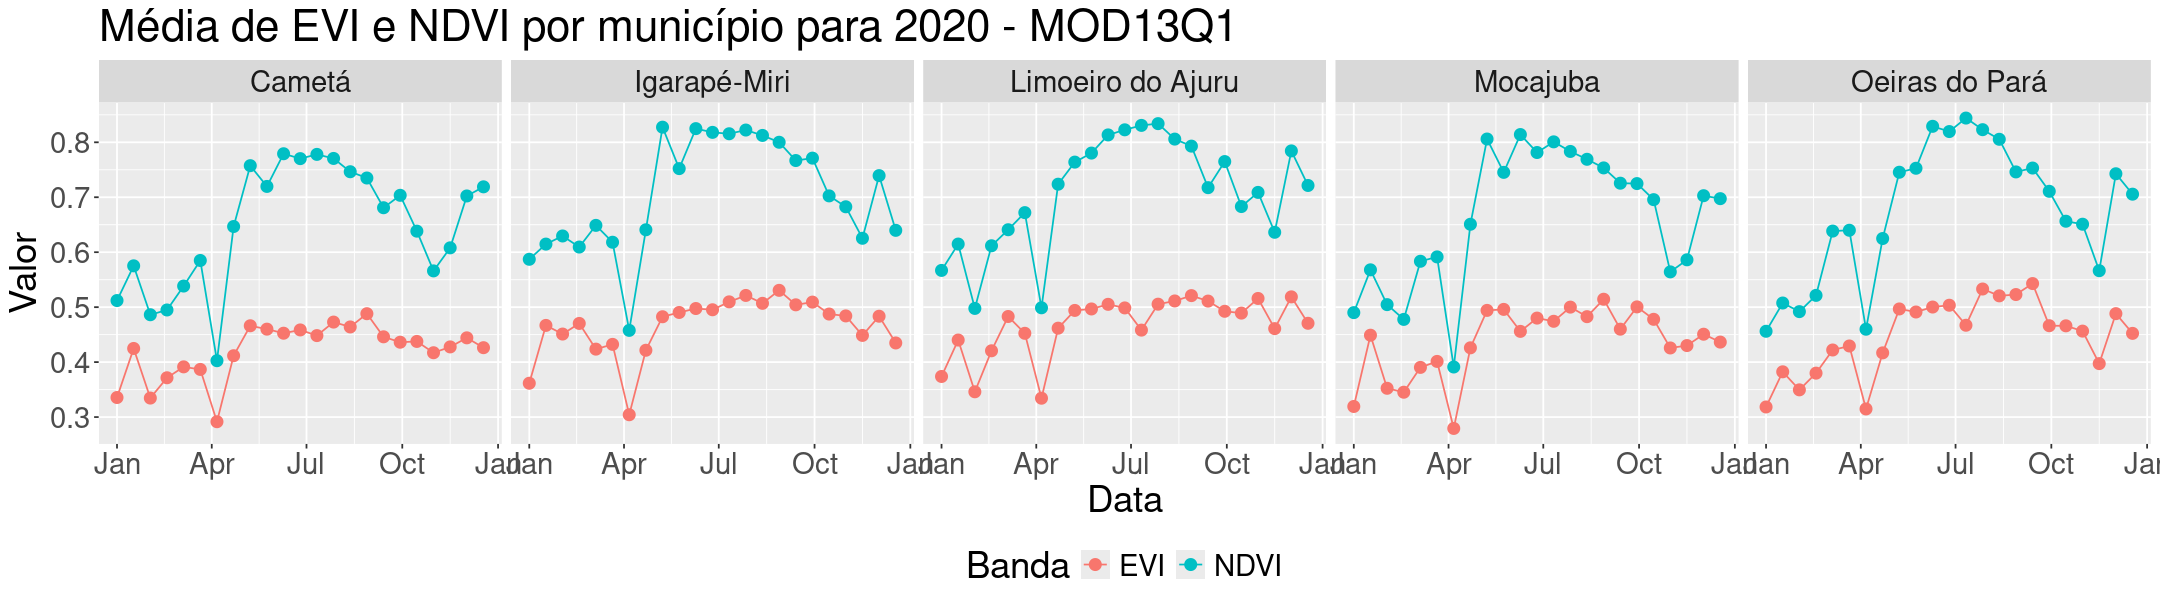

In [91]:
options(repr.plot.height=5, repr.plot.width=18)

df_municipalities_mean %>%
    mutate(value = value / 10000) %>%
    mutate(date = as.Date(date, format = "%Y-%m-%d")) %>%
    ggplot(aes(x = date, y = value, group = band)) +
        facet_grid( ~ name_muni) +
        geom_line(aes(color = band)) +
        labs(title = "Média de EVI e NDVI por município para 2020 - MOD13Q1", x = "Data", y = "Valor") + 
        geom_point(aes(color = band), size = 3) + 
        scale_x_date(date_labels = "%b") + 
        scale_color_discrete(name = "Banda") + 
        theme(
            text = element_text(size = 22),
            legend.position = "bottom"
        )